In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
#Colors grafics
junts = [0,202/255,180/255]
psc = [236/255,0,26/255]
erc = [237/255,172/255,43/255]
comuns = [199/255,21/255,104/255]
pp = [0,151/255,229/255]
vox = [80/255,176/255,40/255]
cup = [232/255,202/255,33/255]
ciudadanos = [246/255,95/255,8/255]
partits = ["ERC","Junts","PSC","PP","Comuns","CUP","VOX"]
color1 = [erc,junts,psc,pp,comuns,cup,vox]
partits2019 = ["ERC","Junts","PSC","PP","Comuns","CUP","VOX","Ciudadanos"]
color2 = [erc,junts,psc,pp,comuns,cup,vox,ciudadanos]

<h3> Functions

In [3]:
def repartimentEscons(resultats,escons,vots):
    res = []
    tmp = []
    tmp2=[]
    esc =  []
    for i in range(1,escons+1):
        for j in range(len(resultats)):
             tmp.append(round((resultats[j]/i)))
             tmp2.append(round((resultats[j]/i)))
        res.append(tmp)
        tmp = []
    tmp2 = sorted(tmp2,reverse=True)
    limit = tmp2[escons-1]
    for i in range(len(res)):
        for j in range(len(res[0])):
            if res[i][j] >= limit:
                esc.append(vots[j])
                
    return (res,limit,esc)

<h1> Projecció resultats eleccions

<h2> Càlcul per provincies

<ul><li>Barcelona: 32</li>
    <li>Girona:  6</li>
    <li>Lleida: 4</li>
    <li>Tarragon 6</li>
</ul>
Total 48 escons a repartir

In [4]:
dades_eleccions = pd.read_csv("data/resultats_generals.csv")
dades_eleccions

,Vots,Barcelona,Percentatge Barcelona,Girona,Percentatge vot Girona,Lleida,Percentatge de vot Lleida,Tarragona,Percentatge de vot Tarragona,Total Catalunya,Percentatge
0,Vots totals,2251163.0,0.55,290300.0,0.542500,180233,0.59,329004.0,0.56,3050700,0.56
1,Abstencions,1818557.0,0.45,244718.0,0.457400,122911,0.41,254438.0,0.44,2440624,0.44
2,Vots en blanc,34085.0,0.02,6306.0,0.022100,4922,0.03,6100.0,0.02,51413,0.02
3,Vots nuls,28282.0,0.01,5851.0,0.020100,4259,0.02,6490.0,0.02,44882,0.01
4,Vot indepe,782633.0,0.35,168382.0,0.580028,96253,0.53,152369.0,0.46,1199637,0.39


<h2> Resultats electorals municipals per provincies

<h3> Barcelona

In [5]:
dades_barcelona = pd.read_csv("data/ResultatsBarcelona.csv")
dades_barcelona                              

,Vots,Barcelona,Percentatge Barcelona
0,ERC,332314,0.1494
1,PSC,571901,0.2572
2,Junts,356644,0.1604
3,Comuns,243065,0.1093
4,CUP,93675,0.0421
5,PP,211593,0.0951
6,VOX,120213,0.0540
7,ARA PL,27384,0.0123
8,AAE1OSONA,3724,0.0016
9,TXT,26732,0.0120


In [6]:
esconsBarcelona = 32
resultats_Barcelona = dades_barcelona["Barcelona"]
partits_Barcelona = dades_barcelona["Vots"]

In [7]:
res,limit,esconsRepartitsBarcelona = repartimentEscons(resultats_Barcelona,esconsBarcelona,partits_Barcelona)
dataBarcelona = pd.DataFrame(res, columns=dades_barcelona["Vots"])
dataBarcelona.style.applymap(lambda x: 'background-color : green' if x>=limit else '')


Vots,ERC,PSC,Junts,Comuns,CUP,PP,VOX,ARA PL,AAE1OSONA,TXT,AM-LVDVDM,POBLE UNIT,MXGI,FIC
0,332314,571901,356644,243065,93675,211593,120213,27384,3724,26732,2577,216,1862,1448
1,166157,285950,178322,121532,46838,105796,60106,13692,1862,13366,1288,108,931,724
2,110771,190634,118881,81022,31225,70531,40071,9128,1241,8911,859,72,621,483
3,83078,142975,89161,60766,23419,52898,30053,6846,931,6683,644,54,466,362
4,66463,114380,71329,48613,18735,42319,24043,5477,745,5346,515,43,372,290
5,55386,95317,59441,40511,15612,35266,20036,4564,621,4455,430,36,310,241
6,47473,81700,50949,34724,13382,30228,17173,3912,532,3819,368,31,266,207
7,41539,71488,44580,30383,11709,26449,15027,3423,466,3342,322,27,233,181
8,36924,63545,39627,27007,10408,23510,13357,3043,414,2970,286,24,207,161
9,33231,57190,35664,24306,9368,21159,12021,2738,372,2673,258,22,186,145


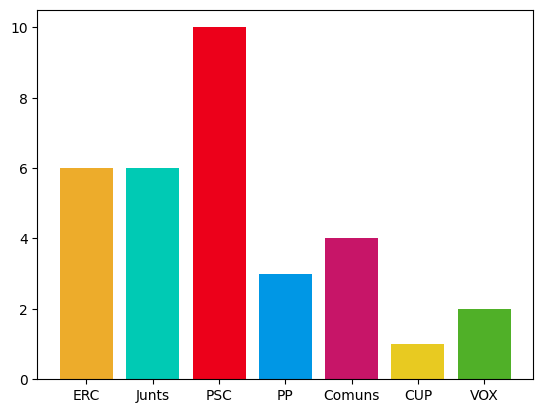

In [43]:
dict_resultatsBarcelona = {}
for i in partits:
    dict_resultatsBarcelona[i] = esconsRepartitsBarcelona.count(i)
#["Erc","PSC","Junts","PP","Comuns","CUP","VOX","Ciudadanos"]

plt.bar(list(dict_resultatsBarcelona.keys()),list(dict_resultatsBarcelona.values()), color=color1);


<h3>Girona

In [9]:
dades_girona = pd.read_csv("data/ResultatsGirona.csv")
dades_girona                              

,Vots,Girona,Percentatge vot Girona
0,Junts,80488,0.2829
1,ERC,64658,0.2273
2,PSC,40045,0.1407
3,CUP,23236,0.0816
4,TE,12787,0.0449
5,IDSELVA,8071,0.0283
6,IDC,2221,0.0078
7,VOX,8608,0.0302
8,Comuns,7223,0.0253
9,ARA PL,6546,0.0230


In [10]:
esconsGirona = 6
resultats_Girona = dades_girona["Girona"]
partits_Girona = dades_girona["Vots"]

In [11]:
res,limit,esconsRepartitsGirona = repartimentEscons(resultats_Girona,esconsGirona,partits_Girona)
dataGirona = pd.DataFrame(res, columns=dades_girona["Vots"])


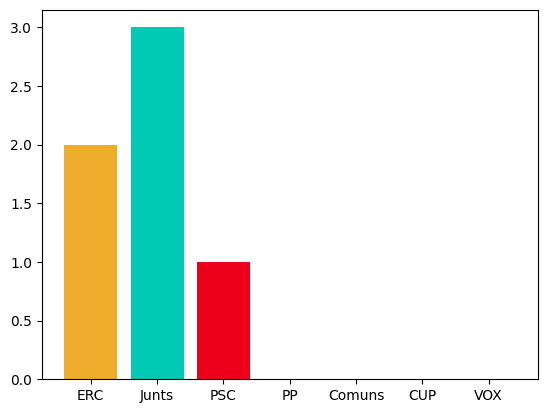

In [40]:
dict_resultatsGirona = {}
for i in partits:
    dict_resultatsGirona[i] = esconsRepartitsGirona.count(i)
#["Erc","PSC","Junts","PP","Comuns","CUP","VOX","Ciudadanos"]

plt.bar(list(dict_resultatsGirona.keys()),list(dict_resultatsGirona.values()), color=color1);


<h3>Lleida

In [13]:
dades_lleida = pd.read_csv("data/ResultatsLleida.csv")
dades_lleida                              

,Vots,Lleida,Percentatge de vot Lleida
0,ERC,48099,0.2733
1,Junts,47522,0.2700
2,PSC,30950,0.1758
3,ARA PL,8457,0.0480
4,CUP,632,0.0359
5,PP,10444,0.0593
6,CDA-PNA,145,0.0082
7,AAE1PALLARSSOBIRA,321,0.0018
8,EV,363,0.0020
9,AGRUPACIÓ D'ELECTORS-PRIMER ALCOLETGE,847,0.0048


In [14]:
esconsLleida = 4
resultats_Lleida = dades_lleida["Lleida"]
partits_Lleida = dades_lleida["Vots"]

In [15]:
res,limit,esconsRepartitsLleida = repartimentEscons(resultats_Lleida,esconsLleida,partits_Lleida)
dataLleida = pd.DataFrame(res, columns=dades_lleida["Vots"])
dataLleida.style.applymap(lambda x: 'background-color : green' if x>=limit else '')


Vots,ERC,Junts,PSC,ARA PL,CUP,PP,CDA-PNA,AAE1PALLARSSOBIRA,EV,AGRUPACIÓ D'ELECTORS-PRIMER ALCOLETGE,APC
0,48099,47522,30950,8457,632,10444,145,321,363,847,783
1,24050,23761,15475,4228,316,5222,72,160,182,424,392
2,16033,15841,10317,2819,211,3481,48,107,121,282,261
3,12025,11880,7738,2114,158,2611,36,80,91,212,196


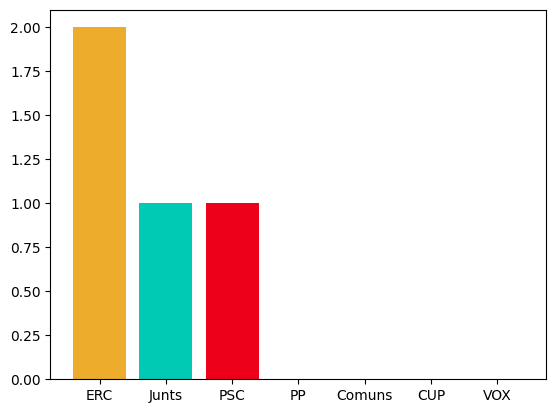

In [39]:
dict_resultatsLleida = {}
for i in partits:
    dict_resultatsLleida[i] = esconsRepartitsLleida.count(i)
#["Erc","PSC","Junts","PP","Comuns","CUP","VOX","Ciudadanos"]

plt.bar(list(dict_resultatsLleida.keys()),list(dict_resultatsLleida.values()), color=color1);


<h3> Tarragona

In [17]:
dades_tarragona = pd.read_csv("data/ResultatsTarragona.csv")
dades_tarragona                              

,Vots,Tarragona,Percentatge de vot Tarragona
0,ERC,74762,0.2318
1,Junts,67435,0.2090
2,PSC,70053,0.2172
3,ARA PL,13057,0.0404
4,F.I.C.,3953,0.0122
5,Comuns,12465,0.0386
6,CUP,10172,0.0315
7,PP,1789,0.0554
8,VOX,16793,0.0520
9,APCANVI,1638,0.0050


In [18]:
esconsTarragona = 6
resultats_Tarragona = dades_tarragona["Tarragona"]
partits_Tarragona = dades_tarragona["Vots"]

In [19]:
res,limit,esconsRepartitsTarragona = repartimentEscons(resultats_Tarragona,esconsTarragona,partits_Tarragona)
dataTarragona = pd.DataFrame(res, columns=dades_tarragona["Vots"])
dataTarragona.style.applymap(lambda x: 'background-color : green' if x>=limit else '')

Vots,ERC,Junts,PSC,ARA PL,F.I.C.,Comuns,CUP,PP,VOX,APCANVI
0,74762,67435,70053,13057,3953,12465,10172,1789,16793,1638
1,37381,33718,35026,6528,1976,6232,5086,894,8396,819
2,24921,22478,23351,4352,1318,4155,3391,596,5598,546
3,18690,16859,17513,3264,988,3116,2543,447,4198,410
4,14952,13487,14011,2611,791,2493,2034,358,3359,328
5,12460,11239,11676,2176,659,2078,1695,298,2799,273


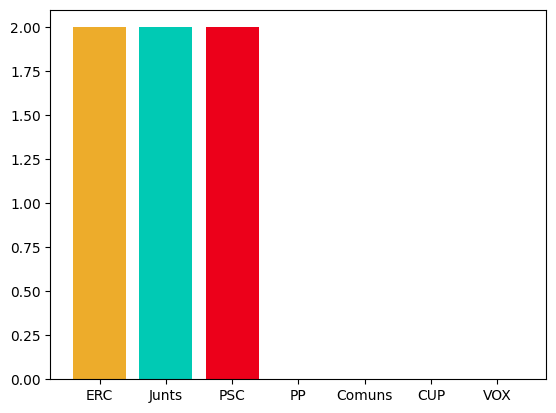

In [36]:
dict_resultatsTarragona = {}
for i in partits:
    dict_resultatsTarragona[i] = esconsRepartitsTarragona.count(i)
#["Erc","PSC","Junts","PP","Comuns","CUP","VOX","Ciudadanos"]

plt.bar(list(dict_resultatsTarragona.keys()),list(dict_resultatsTarragona.values()), color=color1);


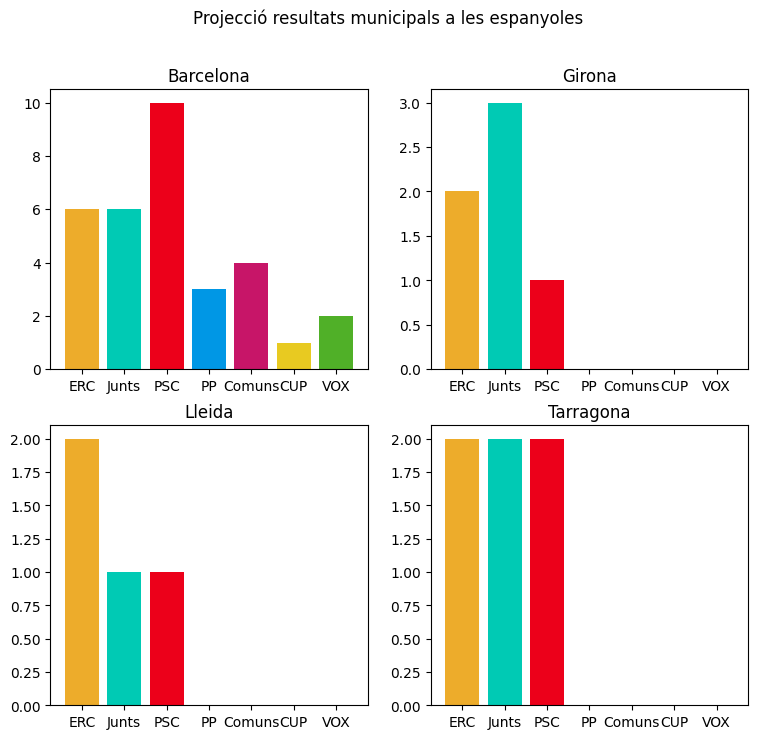

In [49]:
fig, axs = plt.subplots(2, 2,figsize=(9, 8))
fig.suptitle("Projecció resultats municipals a les espanyoles")
axs[0,0].set_title("Barcelona");
axs[0,1].set_title("Girona");
axs[1,0].set_title("Lleida");
axs[1,1].set_title("Tarragona");
axs[0,0].bar(list(dict_resultatsBarcelona.keys()),list(dict_resultatsBarcelona.values()), color=color1);
axs[0,1].bar(list(dict_resultatsGirona.keys()),list(dict_resultatsGirona.values()), color=color1);
axs[1,0].bar(list(dict_resultatsLleida.keys()),list(dict_resultatsLleida.values()), color=color1);
axs[1,1].bar(list(dict_resultatsTarragona.keys()),list(dict_resultatsTarragona.values()), color=color1);

<h4> Resultats globals

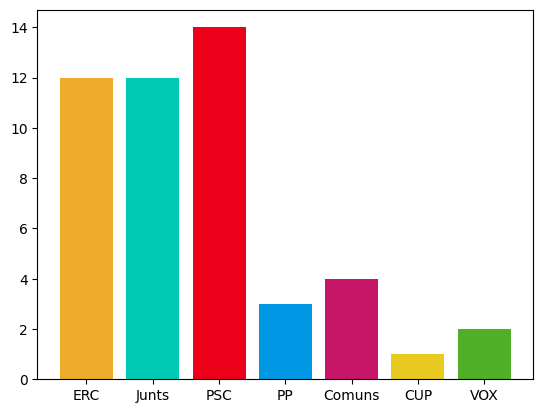

In [22]:
esconsCatalunya = esconsRepartitsBarcelona + esconsRepartitsGirona + esconsRepartitsLleida + esconsRepartitsTarragona

dict_resultats = {}
for i in partits:
    dict_resultats[i] = esconsCatalunya.count(i)
#["Erc","PSC","Junts","PP","Comuns","CUP","VOX","Ciudadanos"]

plt.bar(list(dict_resultats.keys()),list(dict_resultats.values()), color=color1);


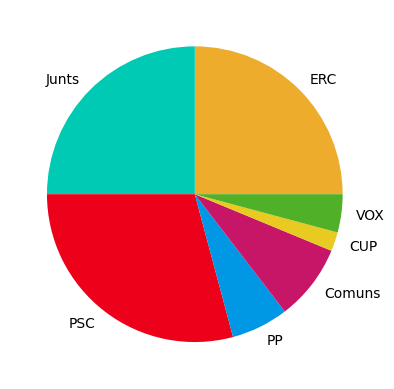

In [23]:
dict_resultats = {}
for i in partits:
    dict_resultats[i] = esconsCatalunya.count(i)
  
plt.pie(list(dict_resultats.values()), labels = list(dict_resultats.keys()),colors=color2);

<h3>Resultats 2019

In [24]:
erc = ["ERC" for i in range(13)]
psc = ["PSC" for i in range(12)]
junts = ["Junts" for i in range(8)]
comuns = ["Comuns" for i in range(7)]
pp = ["PP" for i in range(2)]
cup = ["CUP" for i in range(2)]
vox = ["VOX" for i in range(2)]
ciudadanos = ["Ciudadanos" for i in range(2)]
esconsCatalunya2019 = erc + psc + junts + comuns + pp + cup + vox + ciudadanos


In [25]:
dict_resultats2019 = {}
for i in partits2019:
    dict_resultats2019[i] = esconsCatalunya2019.count(i)


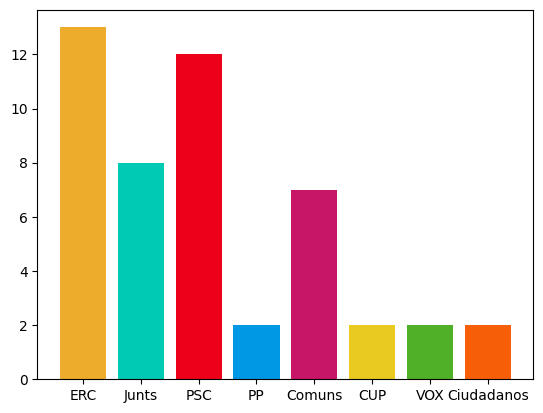

In [28]:

plt.bar(list(dict_resultats2019.keys()),list(dict_resultats2019.values()), color=color2);

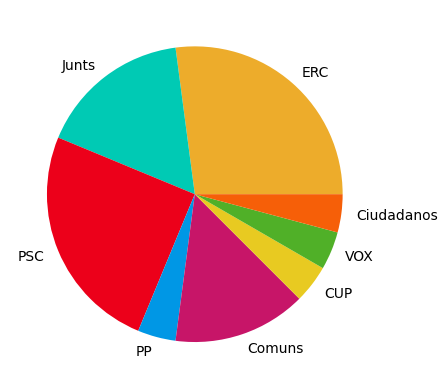

In [29]:
plt.pie(list(dict_resultats2019.values()), labels = list(dict_resultats2019.keys()), colors=color2);

<h4> Comparativa vs 2019 

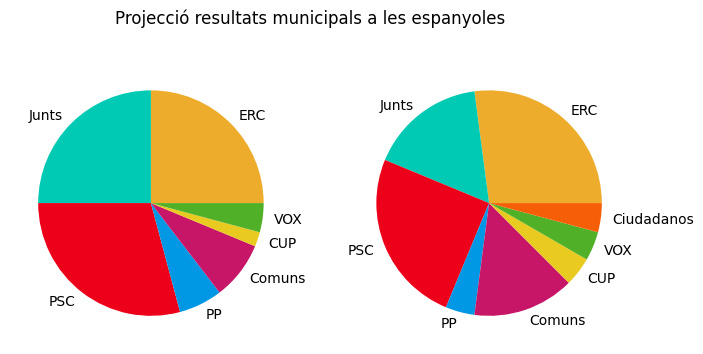

In [31]:
fig, axs = plt.subplots(1,2,figsize=(8, 4))
fig.suptitle("Projecció resultats municipals a les espanyoles")

axs[1].pie(list(dict_resultats2019.values()), labels = list(dict_resultats2019.keys()),colors=color2);
axs[0].pie(list(dict_resultats.values()), labels = list(dict_resultats.keys()),colors=color1);